In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spaudiopy as spa
from scipy.special import lpmv

plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.figsize'] = [16 / 2, 9 / 2]
plt.rcParams['savefig.format'] = 'svg'
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

Introduction to Ambisonics
==========================
Fundamentals
---


Chris Hold, Virtual Acoustics (Aalto University), Spring 2021

## Structure

- Motivation
- Discovering Spherical Harmonics
- Ambisonics Encoder and Decoder


From Recording to Playback
---
  <img src="figs/Setup2Playback.png" width="500">

Audio Description Formats
---

 Channel Based | Object Based | Scene Based
 -| - | -
![Channel](figs/PictureChannel.png)    |    ![Object](figs/PictureObject.png)    |    ![Scene](figs/PictureScene.png)

Benefits of Scene-based
---

- Separation of recording, transmission / storage, and playback
- Flexible with multiple options for each stage
- Does not scale with the number of sources

Ambisonics
---
- Implementation of a scene based format
- "Long" history and connection to other sciences
- Use spherical harmonics as basis functions

In [2]:
# Define angles
phi = np.linspace(0, 2*np.pi, 500, endpoint=False)  # Azi
theta = np.linspace(0, np.pi, 250)  # zen / colat

### Example

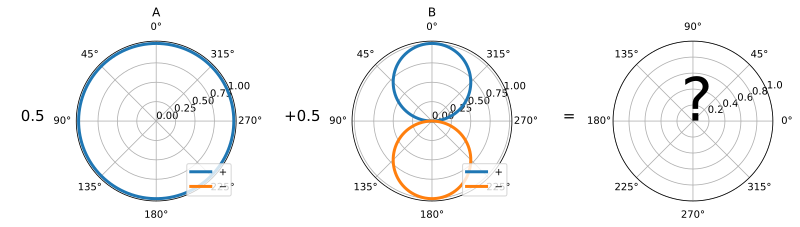

In [3]:
fig, axs = plt.subplots(1, 6, figsize=(11, 5), constrained_layout=True, 
                        subplot_kw=dict(polar=True), gridspec_kw=dict(width_ratios=[1, 6, 1, 6, 1, 6]))
axs[0].axis('off')
axs[0].text(0, 0., "$0.5 $", fontsize=15)
spa.plots.polar(phi, np.real(np.exp(1j * 0 * phi)), INDB=False, ax=axs[1], title="A")
axs[2].axis('off')
axs[2].text(0, 0., "$ + 0.5 $", fontsize=15)
spa.plots.polar(phi, np.real(np.exp(1j * 1 * phi)), INDB=False, ax=axs[3], title="B")
axs[4].axis('off')
axs[4].text(0, 0., "$ = $", fontsize=15)
axs[5].text(np.pi, 0.15, "$?$", fontsize=60);

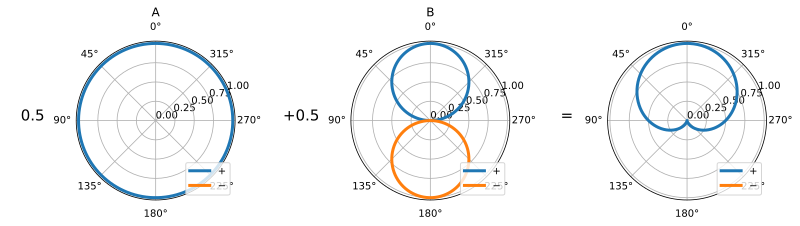

In [4]:
fig, axs = plt.subplots(1, 6, figsize=(11, 5), constrained_layout=True, 
                        subplot_kw=dict(polar=True), gridspec_kw=dict(width_ratios=[1, 6, 1, 6, 1, 6]))
axs[0].axis('off')
axs[0].text(0, 0., "$0.5 $", fontsize=15)
spa.plots.polar(phi, np.real(np.exp(1j * 0 * phi)), INDB=False, ax=axs[1], title="A")
axs[2].axis('off')
axs[2].text(0, 0., "$ + 0.5 $", fontsize=15)
spa.plots.polar(phi, np.real(np.exp(1j * 1 * phi)), INDB=False, ax=axs[3], title="B")
axs[4].axis('off')
axs[4].text(0, 0., "$ = $", fontsize=15)
spa.plots.polar(phi, np.real(0.5 * np.exp(1j * 0 * phi) + 0.5 * np.exp(1j * 1 * phi)), INDB=False, ax=axs[5])

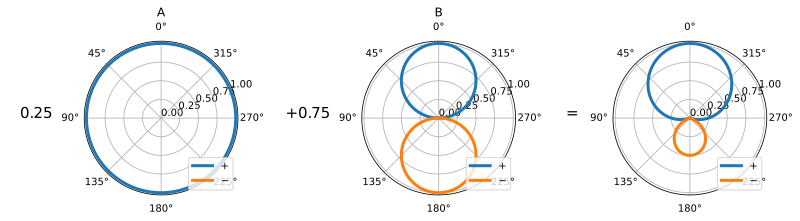

In [5]:
fig, axs = plt.subplots(1, 6, figsize=(11, 5), constrained_layout=True, 
                        subplot_kw=dict(polar=True), gridspec_kw=dict(width_ratios=[1, 6, 1, 6, 1, 6]))
axs[0].axis('off')
axs[0].text(0, 0., "$0.25 $", fontsize=15)
spa.plots.polar(phi, np.real(np.exp(1j * 0 * phi)), INDB=False, ax=axs[1], title="A")
axs[2].axis('off')
axs[2].text(0, 0., "$ + 0.75 $", fontsize=15)
spa.plots.polar(phi, np.real(np.exp(1j * 1 * phi)), INDB=False, ax=axs[3], title="B")
axs[4].axis('off')
axs[4].text(0, 0., "$ = $", fontsize=15)
spa.plots.polar(phi, np.real(0.25 * np.exp(1j * 0 * phi) + 0.75 * np.exp(1j * 1 * phi)), INDB=False, ax=axs[5])

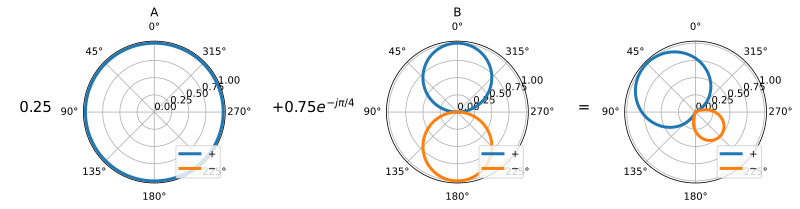

In [6]:
fig, axs = plt.subplots(1, 6, figsize=(11, 5), constrained_layout=True, 
                        subplot_kw=dict(polar=True), gridspec_kw=dict(width_ratios=[1, 6, 1, 6, 1, 6]))
axs[0].axis('off')
axs[0].text(0, 0., "$0.25 $", fontsize=15)
spa.plots.polar(phi, np.real(np.exp(1j * 0 * phi)), INDB=False, ax=axs[1], title="A")
axs[2].axis('off')
axs[2].text(0, 0., "$ + 0.75 e^{-j\pi/4}$", fontsize=15)
spa.plots.polar(phi, np.real(np.exp(1j * 1 * phi)), INDB=False, ax=axs[3], title="B")
axs[4].axis('off')
axs[4].text(0, 0., "$ = $", fontsize=15)
spa.plots.polar(phi, np.real(0.25 * np.exp(1j * 0 * phi) + 0.75 * np.exp(1j * 1 * phi) * np.exp(1j*-np.pi/4)), INDB=False, ax=axs[5])

From the Wave Equation to Spherical Harmonics
---

Wave equation
\begin{equation}\label{eq:waveeq}
	\nabla^2 p - \frac{1}{c^2} \frac{\partial^2 p}{\partial t^2} = 0
\quad.
\end{equation}

In frequency domain, with wave-number $k = \frac{\omega}{c}$ results in the Helmholtz equation
\begin{equation}\label{eq:helmholtz}
	(\nabla^2 + k^2) p = 0
\quad.
\end{equation}

Multiple solutions, e.g. a mono chromatic plane wave with amplitude $\hat{A}(\omega)$ in Cartesian coordinates
\begin{equation}
p(t, x, y, z) = \hat{A}(\omega) e^{i(k_x x + k_y y + k_z z - \omega t)}
\quad.
\end{equation}

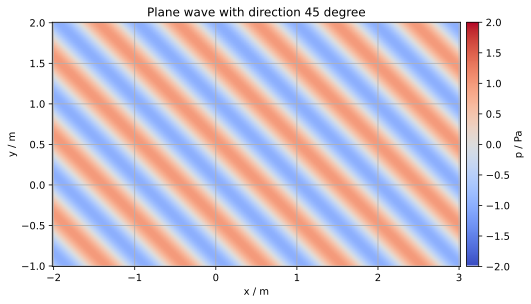

In [7]:
import sfs
omega = 2*np.pi*500
x0 = 1.5, 1, 0

grid = sfs.util.xyz_grid([-2, 3], [-1, 2], 0, spacing=0.02)
direction = 45  # degree
n0 = sfs.util.direction_vector(np.radians(direction))
p = sfs.fd.source.plane(omega, x0, n0, grid)
sfs.plot2d.amplitude(p, grid, colorbar_kwargs=dict(label="p / Pa"))
plt.title(f"Plane wave with direction {direction} degree");

Any solution to the Helmholtz equation can also be expressed in spherical coordinates
$$
p(r, \theta, \phi, k) =  \sum_{n = 0}^{\infty} \sum_{m=-n}^{n} \color{darkgreen}{(A_{mn} j_n(kr) + B_{mn} y_n(kr))} \; \color{darkblue}{Y_{n}^{m}(\theta,\phi)}
\quad,
$$

$$
p(r, \theta, \phi, k) =  \sum_{n = 0}^{\infty} \sum_{m=-n}^{n} \color{darkgreen}{C_{mn}(kr)} \; \color{darkblue}{Y_{n}^{m}(\theta,\phi)}
\quad,
$$

With two separable parts:
- <font color='darkgreen'>radial</font> component : linear combination of spherical Bessel functions of first ($ j_n $) and second kind $ y_n $
- <font color='darkblue'>angular</font>  component : spherical harmonics $ \color{darkblue}{Y_{n}^{m}(\theta,\phi)} $ 

**sound field defined on a sphere is fully captured by its spherical harmonics coefficients**

E.g. a unit plane wave
\begin{equation}
p(r, \theta, \phi, k) = \sum_{n = 0}^{\infty} \sum_{m=-n}^{n} 4 \pi i^n j_n(kr) \left[ Y_n^m(\theta_k,\phi_k) \right] ^* Y_{n}^ {m}(\theta,\phi)
\quad.
\end{equation}

Discovering Spherical Harmonics
---

$$
Y_n^m(\theta,\phi)=\color{darkorange}{\sqrt{\frac{2n+1}{4\pi}\frac{(n-m)!}{(n+m)!}}}\, \color{darkgreen}{P_n^m(\cos(\theta))}\,  \color{darkred}{e^{im\phi}}
\quad, 
$$

$$
Y_n^m(\theta,\phi)=\color{darkorange}{D_{nm}}\, \color{darkgreen}{P_n^m(\cos(\theta))}\,  \color{darkred}{e^{im\phi}}
\quad, 
$$
where
- azimuth as $\phi$ and zenith/colatitude as $\theta$.
- $P_n^m$ is the associated Legendre polynomial of order $n$ and degree $m$.


Combined with appropriate scaling give real Spherical Harmonics $Y_{n,m}(\theta,\phi)$ as

$$
Y_{n,m}(\theta,\phi) = \sqrt{ \frac{(2n+1)}{4\pi} \frac{(n-|m|)!}{(n+|m|)!} } P_{n,|m|}(\cos(\theta))
        \begin{cases}
            \sqrt2\sin(|m|\phi) & \mathrm{if\hspace{0.5em}} m < 0 \quad,\\
            1 & \mathrm{if\hspace{0.5em}} m = 0 \quad,\\
            \sqrt2\cos(|m|\phi) & \mathrm{if\hspace{0.5em}} m > 0 \quad.
        \end{cases}
$$

- Always check: Condon–Shortley phase convention $(-1)^m$

<div style="text-align:center">
<img src="figs/RealSH.png" alt="realSH" width="500" align="centre"/>
</div>

Let's look at the **azimuthal** component $e^{im\phi}$ and the **zenithal** component $P_n^m(\cos\theta)$

### **azimuthal** component

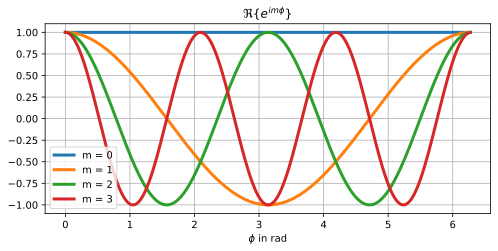

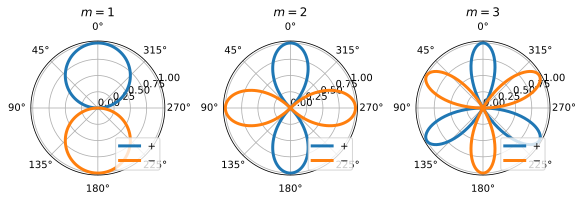

In [8]:
from scipy.special import lpmv

fig = plt.figure(figsize=(8, 3.5))
for m in [0, 1, 2, 3]:
    plt.plot(phi, np.real(np.exp(1j * m * phi)), label=f"m = {m}")
    #plt.plot(phi, np.imag(np.exp(1j * m * phi)), '--')
plt.xlabel("$\phi$ in rad")
plt.legend()
plt.title("$\Re \{e^{im\phi} \} $");

fig, axs = plt.subplots(1, 3, constrained_layout=True, subplot_kw=dict(polar=True))
for m in [1, 2, 3]:
    spa.plots.polar(phi, np.real(np.exp(1j * m * phi)), INDB=False, title=f"$ m = {m}$", ax=axs[m-1])

### **zenithal** component

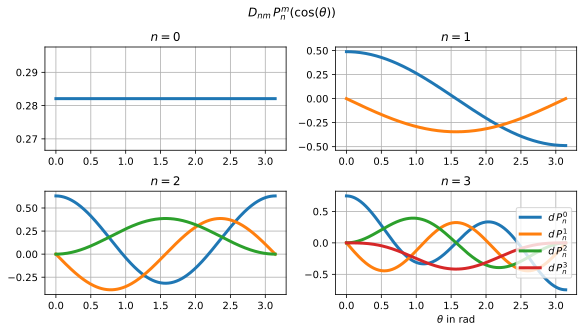

In [9]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
axs = np.ravel(axs)
fig.suptitle(r"$D_{nm} \, P_n^m(\cos(\theta))$")
for n in [0, 1, 2, 3]:
    axs[n].set_title(f"$n = {n}$")
    for m in range(n+1):
        d_nm =  np.sqrt((2*n+1)/(4*np.pi) * np.math.factorial(n-m)/np.math.factorial(n+m))
        P_nm = lpmv(m, n, np.cos(theta))
        axs[n].plot(theta, d_nm * P_nm, label=f"$d\, P_n^{m}$")

plt.legend(loc='right')
plt.xlabel(r"$\theta$ in rad");

Orthonormality
---
Two functions $\color{darkviolet}f, \color{darkred}g$ over a domain $\gamma$ are **orthogonal** if

$$
    \int_\gamma \color{darkviolet}{f^*(\gamma)} \color{darkred}{g(\gamma)} \,\mathrm{d}\gamma = \langle \color{darkviolet}f, \color{darkred}g \rangle = 0 \quad,\,\mathrm{for}~f \neq g.
$$

They are also **orthonormal** if
$$ \color{darkviolet}{\int_\gamma f^*(\gamma) f(\gamma) \,\mathrm{d}\gamma = \int_\gamma|f(\gamma)|^2 \,\mathrm{d}\gamma = \langle f, f \rangle } = 1 \quad, \\
\color{darkred}{\int_\gamma g^*(\gamma) g(\gamma) \,\mathrm{d}\gamma = \int_\gamma |g(\gamma)|^2 \,\mathrm{d}\gamma = \langle g, g \rangle} = 1 \quad.$$

For the Spherical Harmonics:
- the the azimuthal component $e^{im\phi}$ along $\phi$ is orthogonal w.r.t. the degree $m$
- the zenithal component $P_n^m(\cos\theta)$ along $\theta$ is orthogonal w.r.t. the order $n$.

Their product is still orthogonal, and the scaling $\color{darkorange}{D_{nm}}$ ensures orthonormality such that
$$
    \int_\Omega Y_n^m(\Omega)^* \, Y_{n'}^{m'}(\Omega) \,\mathrm{d}\Omega = \langle Y_n^m(\Omega) , Y_{n'}^{m'}(\Omega) \rangle = \delta_{nn'}\delta_{mm'}
    \quad ,
$$

and

$$
    \int_{{\Omega} \in \mathbb{S}^2} |Y_n^m({\Omega})|^2 \mathrm{d}{\Omega} = 1
    \quad .
$$


### Example
show normality for $Y_0^0$:
$$
Y_0^0(\theta,\phi)=\sqrt{\frac{0+1}{4\pi}\frac{(0)!}{(0)!}} P_0^0(\cos(\theta)) e^{i0\phi} = \sqrt{\frac{1}{4\pi}}
\quad,
$$
hence
$$
    \int_{{\Omega} \in \mathbb{S}^2} Y_0^0(\theta,\phi)^* Y_0^0(\theta,\phi) \,\mathrm{d}{\Omega} = \int_{{\Omega} \in \mathbb{S}^2} \sqrt{\frac{1}{4\pi}}\sqrt{\frac{1}{4\pi}} \, \mathrm{d}{\Omega} = 4\pi \frac{1}{4\pi} = 1
\quad.
$$

### Example
Test azimuthal components $f_{azi} = e^{i 2 \phi}, \;g_{azi} = e^{i3 \phi}$,

and zenithal components $f_{zen} = P_1^1(\cos\theta), \;g_{zen} = P_2^1(\cos\theta)$ .

Test for orthogonality in azimuth <f_azi, g_azi> =  0.0
Test for orthogonality in zenith <f_zen, g_zen> =  0.0


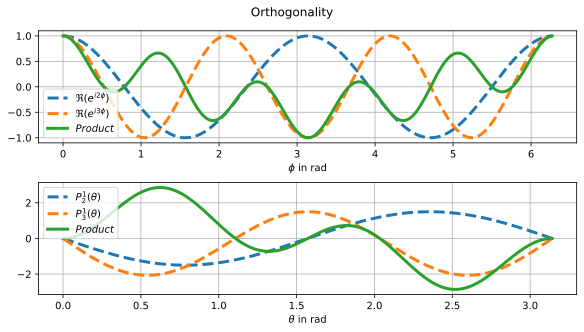

In [10]:
f_azi = np.exp(1j * 2 * phi)
g_azi = np.exp(1j * 3 * phi)

n_f = 2
m_f = 1
f_zen = lpmv(m_f, n_f, np.cos(theta))
n_g = 3
m_g = 1
g_zen = lpmv(m_g, n_g, np.cos(theta))

fig, axs = plt.subplots(2, 1, constrained_layout=True)
fig.suptitle(r"Orthogonality")
axs[0].plot(phi, np.real(f_azi), '--', label="$\Re(e^{i 2 \phi})$")
axs[0].plot(phi, np.real(g_azi), '--', label="$\Re(e^{i 3 \phi})$")
axs[0].plot(phi, np.real(f_azi)*np.real(g_azi), label="$Product$")
axs[1].plot(theta, (f_zen), '--', label=fr"$P_{n_f}^{m_f}(\theta)$")
axs[1].plot(theta, (g_zen), '--', label=fr"$P_{n_g}^{m_g}(\theta)$")
axs[1].plot(theta, f_zen*g_zen, label="$Product$")
axs[0].set_xlabel("$\phi$ in rad")
axs[1].set_xlabel(r"$\theta$ in rad")
axs[0].legend()
axs[1].legend()

print("Test for orthogonality in azimuth <f_azi, g_azi> = ", np.round(np.real_if_close(f_azi.conj().T @ g_azi), decimals=3))
print("Test for orthogonality in zenith <f_zen, g_zen> = ", np.round(np.real_if_close(f_zen.conj().T @ g_zen), decimals=3))


Spherical Harmonic Transform (SHT)
---

- Find a scene based encoding for sound field
- We showed that the spherical harmonics $Y_n^m({\Omega})$ are a set of suitable basis functions on the sphere
- We also showed that a sound field (on the sphere) $s({\Omega})$ is fully captured by its spherical harmonics coefficients $\sigma_{nm}$

This can be expressed with $\Omega = [\phi, \theta]$ as the **inverse Spherical Harmonic Transform (iSHT)**
$$
    s({\Omega}) = \sum_{n = 0}^{N=\infty} \sum_{m=-n}^{+n} \sigma_{nm} Y_n^m({\Omega})
\quad.
$$

Spherical harmonics coefficients $\sigma_{nm}$ can be derived with the **Spherical Harmonic Transform (SHT)**
$$
    \sigma_{nm} = \int_{{\Omega} \in \mathbb{S}^2} s({\Omega}) [Y_n^m({\Omega})]^* \mathrm{d}{\Omega} = \langle [Y_n^m({\Omega})] , s({\Omega}) \rangle
\quad.
$$

- SHT also referred to as spherical Fourier transform
- Note the transform from a spatially discrete to continuous domain

Spherical Grids
---
The SHT evaluates the continuous integral over $\Omega$
$$
    \sigma_{nm} = \int_{{\Omega} \in \mathbb{S}^2} s({\Omega}) [Y_n^m({\Omega})]^* \mathrm{d}{\Omega}
    \quad .
$$
Quadrature methods allow evaluation by spherical sampling at certain (weighted) grid points such that
\begin{equation}
    \sigma_{nm} \approx \sum_{q=1}^{Q} w_q s({\Omega}_q) [Y_n^m({\Omega}_q)]^* 
\quad.
\end{equation}

Certain grids with sampling points $ {\Omega}_q $ and associated sampling weights $w_q$ have certain properties:

- quadrature grids allow numerical integration of spatial polynomials
- Spatial sampling dictates maximum order
- easy to evaluate are uniform/regular grids, with constant $w_q = \frac{4\pi}{Q}$
- An example are so-called spherical t-designs(t), which allow a SHT up to order $N = \lfloor t/2 \rfloor$

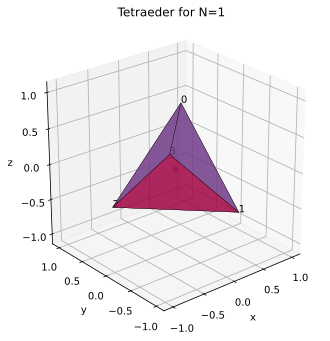

In [11]:
vecs_t1 = spa.grids.load_t_design(degree=2*1)
spa.plots.hull(spa.decoder.get_hull(*vecs_t1.T), title="Tetraeder for N=1")

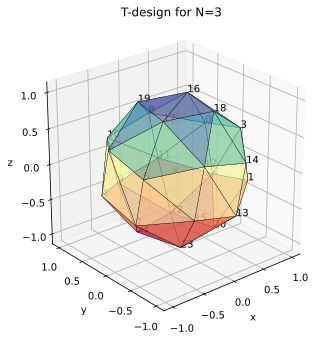

In [12]:
vecs_t3 = spa.grids.load_t_design(degree=2*3)
spa.plots.hull(spa.decoder.get_hull(*vecs_t3.T), title="T-design for N=3")

Spatial Dirac
---
We can show that spherical harmonics are orthogonal (even orthonormal) with
$$
    \int_\Omega Y_n^m(\Omega) \, Y_{n'}^{m'}(\Omega) \,\mathrm{d}\Omega = \delta_{nn'}\delta_{mm'}
    \quad .
$$

Because of their completeness, we can also directly formulate a spatial Dirac function on the sphere as
$$
    \sum_{n=0}^{N=\infty} \sum_{m=-n}^n [Y_n^m({\Omega'})]^* Y_n^m(\Omega) = \delta(\Omega - \Omega') \quad,
$$

and therefore the spherical Fourier coefficients $\sigma_{nm}$
$$
    SHT\{\delta(\Omega - \Omega')\} = \int_{{\Omega} \in \mathbb{S}^2} \delta(\Omega - \Omega') \, [Y_n^m({\Omega})]^* \mathrm{d}{\Omega} = [Y_n^m({\Omega'})]^*
\quad .
$$

Order-Limitation of Spatial Dirac Pulse
---


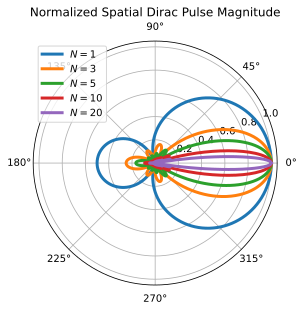

In [13]:
ax = plt.subplot(111, projection='polar')

for N in [1, 3, 5, 10, 20]:
    ax.plot(np.linspace(0, 2*np.pi, 720), 
            abs((4*np.pi)/(N+1)**2 * spa.sph.bandlimited_dirac(N, np.linspace(0, 2*np.pi, 720))),
            label=f"$N = {N}$")
plt.title("Normalized Spatial Dirac Pulse Magnitude")
plt.legend();

### Example
Integrate (order-limited) Spatial Dirac $\delta_N(\Omega - \Omega')$ over sphere

$$
    \int_{{\Omega} \in \mathbb{S}^2} \delta_N(\Omega - \Omega') \mathrm{d}{\Omega} = \int_{{\Omega} \in \mathbb{S}^2} \color{darkblue}{\sum_{n=0}^{N} \sum_{m=-n}^n\, [Y_n^m({\Omega'})]^* Y_n^m(\Omega)} \,\mathrm{d}{\Omega} \quad,
$$

by discretization with sufficient t-design
$$
    \int_{{\Omega} \in \mathbb{S}^2} \color{darkblue}{\sum_{n=0}^{N} \sum_{m=-n}^n\, [Y_n^m({\Omega'})]^* Y_n^m(\Omega)}  \,\mathrm{d}{\Omega} = \frac{4\pi}{Q}\sum_{q=1}^{Q} \color{darkorange}{\sum_{n=0}^{N} \sum_{m=-n}^n\, [Y_n^m({\Omega'})]^* Y_n^m(\Omega_q)} 
$$

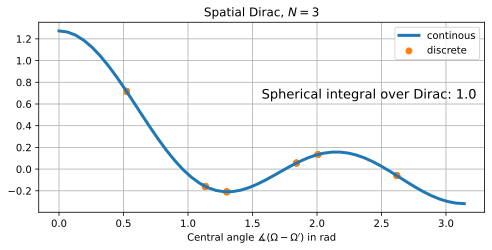

In [14]:
N_sph = 3
azi, zen, _ = spa.utils.cart2sph(*vecs_t3.T)
Q = len(vecs_t3)
# spatial Dirac
azi_k = 0
zen_k = np.pi/2
# get central angle
d = spa.utils.haversine(azi, zen, zen_k, zen_k)
# get bandlimited dirac in space
bandlim_dirac = spa.sph.bandlimited_dirac(N_sph, d)

# Integrate bandlimited dirac over sphere
integrated = np.round(4*np.pi/Q * np.sum(bandlim_dirac), 3)
#print("Spherical integral over Dirac: ", integrated)

fig = plt.figure(figsize=(8, 3.5))
plt.plot(np.linspace(0, np.pi),
         spa.sph.bandlimited_dirac(N_sph, np.linspace(0, np.pi)),
         label='continous')
plt.scatter(d, bandlim_dirac, c='C1', label='discrete')
plt.legend()
plt.text(np.pi/2, 0.65, f"Spherical integral over Dirac: {integrated}", fontsize=13)
plt.xlabel("Central angle $ \measuredangle(\Omega - \Omega')$ in rad");
plt.title(f"Spatial Dirac, $N={N_sph}$");

Matrix Notations
---
Stack the spherical harmonics evaluated at $\Omega$ up to spherical order $N$ as

$$
\mathbf{Y} = \left[ \begin{array}{ccccc}
        Y_0^0(\Omega[0]) & Y_1^{-1}(\Omega[0]) & Y_1^0(\Omega[0]) & \dots & Y_N^N(\Omega[0])  \\
        Y_0^0(\Omega[1]) & Y_1^{-1}(\Omega[1]) & Y_1^0(\Omega[1]) & \dots & Y_N^N(\Omega[1])  \\
        \vdots & \vdots & \vdots & \vdots & \vdots \\
        Y_0^0(\Omega[Q-1]) & Y_1^{-1}(\Omega[Q-1]) & Y_1^0(\Omega[Q-1]) & \dots & Y_N^N(\Omega[Q-1])
        \end{array} \right]
$$

such that $ \mathbf{Y} : [Q, (N+1)^2]$

- soundfield pressure is real signal -> only real spherical harmonics needed
- orthonormal scaling introduced earlier called N3D by convention (in contrast to SN3D)
- stacking them as above, where $idx_{n,m} = n^2+n+m$, is called ACN

Obtaining the discrete signals $s_q(t)$ is a linear combination of SH basis functions evaluated at $\Omega_q$.

This **inverse transform in matrix notation** with ambisonic signals matrix $\mathbf{\chi} : [1, (N+1)^2]$ is

$$
    s_q(t) =  \mathbf{\chi}(t) \, \mathbf{Y}^T \quad .
$$


We obtain ambisonic signals matrix $\chi : [1, (N+1)^2]$ from signals $\mathbf{S} : [1, Q]$ by **SHT** as

$$
    \mathbf{\chi}(t) = \mathbf{S}(t) \, \mathrm{diag}(w_q) \, \mathbf{Y}  \quad.
$$

From the Ambisonics **Encoder**, to **Spatial Weighting**, to a **Decoder**

Encoder
---
- We can stack a time signal $s(t_0, t_1, \ldots, t_n)$ as vector $\mathbf{s}$.
- This leads to a matrix notation of multiple discrete signals $\mathbf{S} : [t, Q]$.
- Similarly, we can stack the Ambisonics coefficients into matrix $\mathbf{\chi} : [t, (N+1)^2]$


A single plane wave encoded in direction $\Omega$ with signal $\mathbf{s}$ is directly the outer product with the spatial Dirac coefficients


$$
    \mathbf{\chi}_{PW(\Omega)} = \mathbf{s} \, \mathbf{Y}(\Omega) \quad.
$$

For multiple sources $Q$, we stack and sum
$$
    \mathbf{\chi}_{PW(\Omega_Q)} = \sum_{q=1}^Q\mathbf{s}_q \, \mathbf{Y}(\Omega_q) = \mathbf{S} \, \mathbf{Y} \quad.
$$

Spatial Weighting
---
- Directionally filtering a soundfield in direction $\Omega_k$ by spatial weighting
- Weighting in SH domain $w_{nm}$ is an elegant way of beamforming

The simplest beamformer is a spatial Dirac in direction $\Omega_k$ normalized by its energy, i.e. $\mathrm{max}DI$
$$
    w_{nm, \mathrm{max}DI}(\Omega_k) = \frac{4\pi}{(N+1)^2} Y_{n,m}(\Omega_k)
$$

In [15]:
fig = plt.figure(constrained_layout=True)
spa.plots.sh_coeffs_subplot([4*np.pi/(16)* spa.sph.sh_matrix(3, 3*np.pi/4, np.pi/4, 'real'), 
                             4*np.pi/(36)* spa.sph.sh_matrix(5, 3*np.pi/4, np.pi/4, 'real')],
                            titles=["$N_{sph} = 3, \;\Omega_k=[3/4\pi, 1/4\pi]$",
                                    "$N_{sph} = 5, \;\Omega_k=[3/4\pi, 1/4\pi]$"],
                            azi_steps=1, el_steps=1, fig = fig)

Other patterns can be achieved by weighting the spherical Fourier spectrum. 
Axis-symmetric patterns reduce to only a modal weighting $d_n$, such that 
$$
    w_{nm}(\Omega_k) = d_{n} \, Y_{n,m}(\Omega_k)
$$

E.g. $\mathrm{max}\vec{r}_E$ weights each order with
$$
    d_{n,\,\mathrm{max}\vec{r}_E} = P_n[\cos(\frac{137.9^\circ}{N+1.51})] \quad,
$$
with the Legendre polynomials $P_n$ of order $n$.


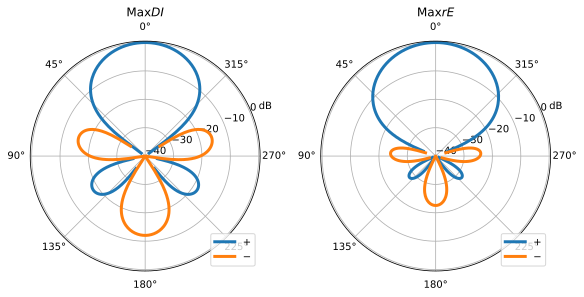

In [16]:
dirac_maxDI = (4*np.pi)/(N_sph+1)**2 * spa.sph.bandlimited_dirac(N_sph, np.linspace(0, 2*np.pi, 360))
w_n = spa.sph.unity_gain(spa.sph.max_rE_weights(N_sph))
dirac_maxRE = spa.sph.bandlimited_dirac(N_sph, np.linspace(0, 2*np.pi, 360),
                                        w_n=w_n)

fig, axs = plt.subplots(1,2, constrained_layout=True, subplot_kw=dict(polar=True))
spa.plots.polar(np.linspace(0, 2*np.pi, 360), dirac_maxDI, title="$\mathrm{Max}{DI}$", ax=axs[0])
spa.plots.polar(np.linspace(0, 2*np.pi, 360), dirac_maxRE, title="$\mathrm{Max}{rE}$", ax=axs[1])

Decoder
---
- Pointing a set of beamformers in directions $\Omega_k$ results in a set of signal components
- in case of $\mathrm{max}DI$ proportional to iSHT in $\Omega_k$

$$
s({\Omega_k}) = \sum_{n = 0}^{N} \sum_{m=-n}^{+n} w_{nm}({\Omega_k}) \, \sigma_{nm} \quad,
$$

or in matrix notation with $\mathbf{S} : [t, Q]$ and beamforming weights $\mathbf{d}_n$
$$
    \mathbf{S} =  \mathbf{\chi} \, \mathrm{diag_N}(\mathbf{d}_n) \, \mathbf{Y}^T \quad .
$$

### Example
Decode on a t-design(6) (sufficient up to $N = 3$):
 - a 3rd order ambisonic signal

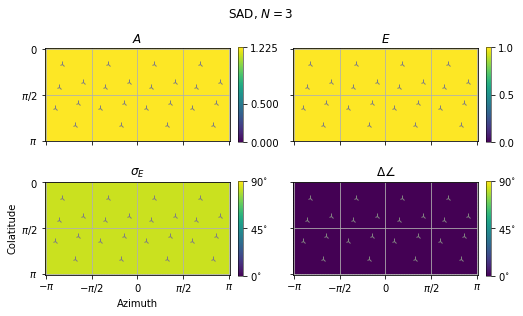

In [17]:
set_matplotlib_formats('png')  # Those plots are too heavy
ls_setup = spa.decoder.LoudspeakerSetup(*vecs_t3.T)
N = 3
spa.plots.decoder_performance(ls_setup, 'SAD', N_sph=N, title=f'$N={N}$')

### Example
Decode on a t-design(6) (sufficient up to $N = 3$):
 - a 5th order ambisonic signal

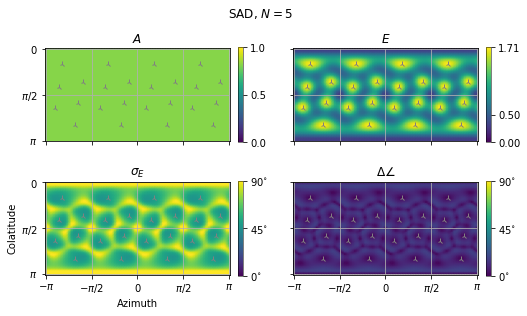

In [18]:
N = 5
spa.plots.decoder_performance(ls_setup, 'SAD', N_sph=N, title=f'$N={N}$')

Loudspeaker Decoders
---

Face not pointing towards listener: [0 1 2]
Face not pointing towards listener: [0 6 2]
Face not pointing towards listener: [2 5 6]
Face not pointing towards listener: [2 3 4]
Face not pointing towards listener: [2 5 4]


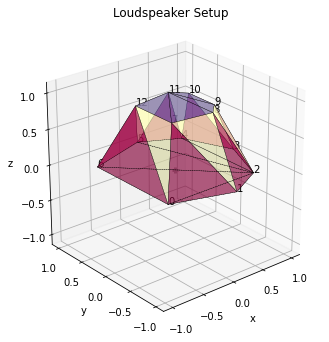

In [19]:
# Loudspeaker Setup
ls_dirs = np.array([[-135, -80, -45, 0, 45, 80, 135, -135, -60, -30, 30, 60, 135],
                    [0, 0, 0, 0, 0, 0, 0, 60, 60, 60, 60, 60, 60]])
ls_x, ls_y, ls_z = spa.utils.sph2cart(spa.utils.deg2rad(ls_dirs[0, :]),
                                      spa.utils.deg2rad(90 - ls_dirs[1, :]))
ls_setup = spa.decoder.LoudspeakerSetup(ls_x, ls_y, ls_z)
ls_setup.pop_triangles(normal_limit=85, aperture_limit=90,
                       opening_limit=150)
ls_setup.show()

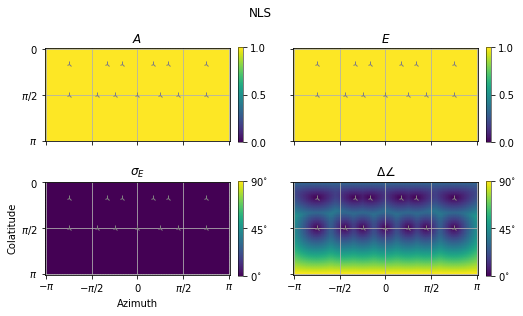

In [20]:
spa.plots.decoder_performance(ls_setup, 'NLS')

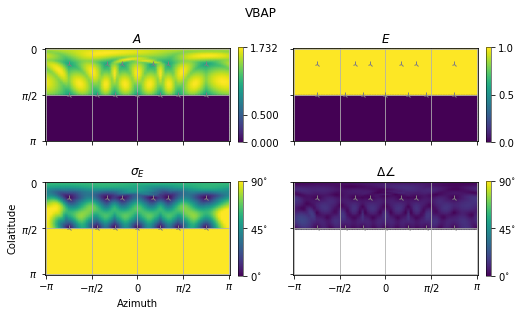

In [21]:
spa.plots.decoder_performance(ls_setup, 'VBAP')

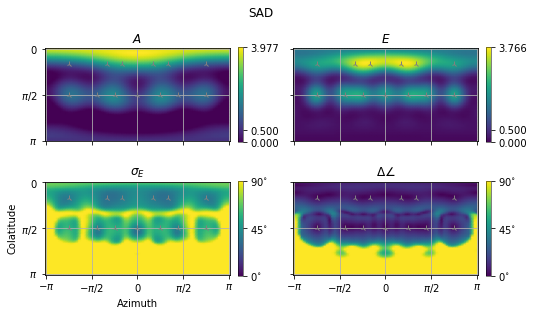

In [22]:
spa.plots.decoder_performance(ls_setup, 'SAD')

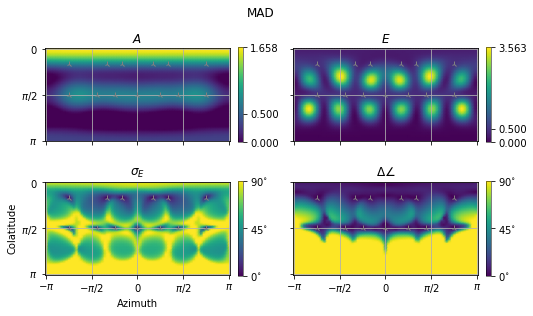

In [23]:
spa.plots.decoder_performance(ls_setup, 'MAD')

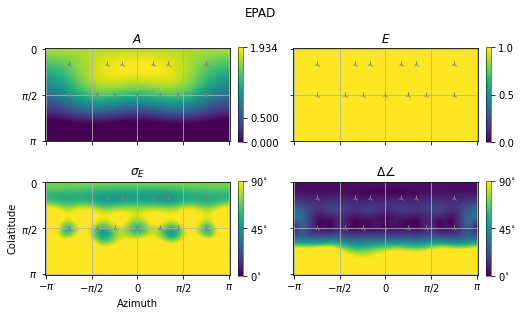

In [24]:
spa.plots.decoder_performance(ls_setup, 'EPAD', N_sph=2)

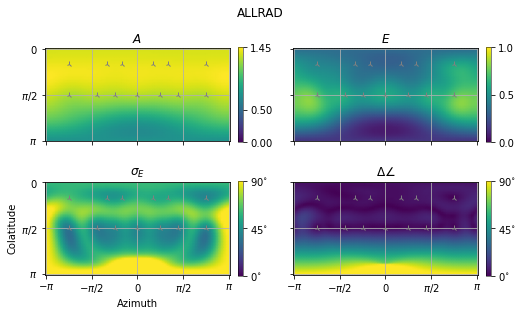

In [25]:
ls_setup.ambisonics_setup(update_hull=True)
spa.plots.decoder_performance(ls_setup, 'ALLRAD')

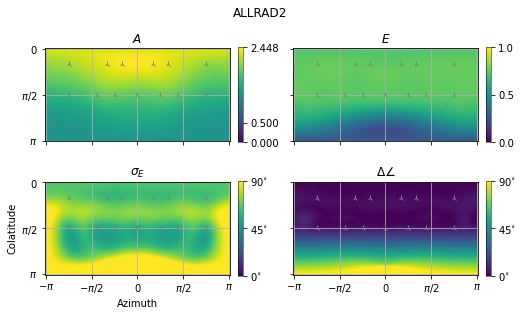

In [26]:
ls_setup.ambisonics_setup(update_hull=True)
spa.plots.decoder_performance(ls_setup, 'ALLRAD2')

Binaural Decoding
---

$$
s^{l,r}(t) = x(t) * h_{\mathrm{HRIR}}^{l,r}({\Omega}, t) \quad,
$$
where $(*)$ denotes the time-domain convolution operation.

Transforming to the time-frequency domain through the time-domain Fourier transform, 
further assuming plane-wave components $\bar X (\Omega)$,
the ear input signals are given as 
$$
S^{l,r}(\omega) = \int_{\Omega} \bar X (\Omega, \omega) H_{nm}^{l,r}(\Omega, \omega) \,\mathrm{d}\Omega
\quad.
$$

$$
S^{l,r}(\omega) = \sum_{n = 0}^{N} \sum_{m = -n}^{+n} \breve X_{nm}(\omega) \breve H_{nm}^{l,r}(\omega) \quad.
$$

For one ear (left) this can be interpreted as a frequency dependent ambisonic beamformer 
$$
    s^l(\omega) =  \chi_{nm}(\omega) [\breve H_{nm}^{l}(\omega)]^T  \quad .
$$



In [27]:
%%capture
# Create Static
!jupyter-nbconvert --to html Introduction_Ambisonics.ipynb --TagRemovePreprocessor.remove_input_tags hide_input
# Create Slides
!jupyter-nbconvert --to slides Introduction_Ambisonics.ipynb --SlidesExporter.reveal_scroll=True --TagRemovePreprocessor.remove_input_tags hide_input